In [1]:
import pretty_midi
import py_midicsv
from librosa import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pypianoroll
import numpy as np

%load_ext autoreload
%autoreload 2

#Range of the piano keys is from 21:109 so we will utilze only these notes!

In [2]:
path = 'D:\\GhostPresentation\\data\\lmd_matched\\A\\A\\M\\TRAAMBM128F4248306\\1d2b92aa9e454280cca21fae99ebce8e.mid'
path2 = 'D:\\GhostPresentation\\data\\lmd_matched\\E\\E\\F\\TREEFVB128F428A436\\71b6da7385f5962381b054135098a973.mid'

In [3]:
pm = pretty_midi.PrettyMIDI(path)

In [4]:
piano_roll = pm.get_piano_roll()

In [5]:
piano_roll.shape

(128, 19545)

Text(0.5, 1.0, 'MIDI piano roll')

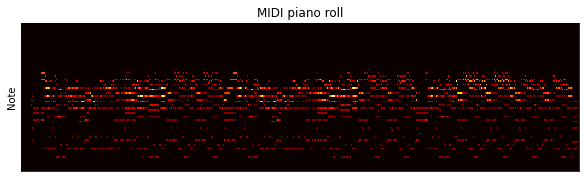

In [6]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
display.specshow(piano_roll[21:109], y_axis='cqt_note', cmap=plt.cm.hot)
plt.title('MIDI piano roll')

In [7]:
multitrack = pypianoroll.read(path)
print(multitrack)


Multitrack(name=None, resolution=24, tempo=array(shape=(9048, 1), dtype=float64), tracks=[StandardTrack(name='', program=56, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=True, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=108, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=33, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=25, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=26, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=41, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=82, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrac

<AxesSubplot:xlabel='time (step)', ylabel='pitch'>

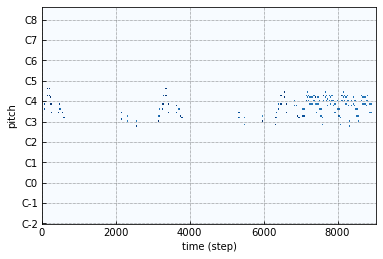

In [8]:
track = multitrack.tracks[0]
track.plot()

<AxesSubplot:xlabel='time (step)', ylabel='key name'>

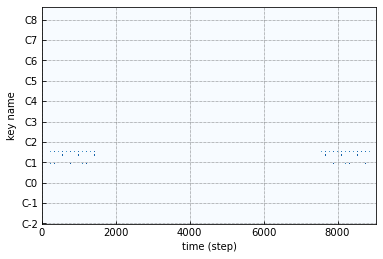

In [9]:
track1 = multitrack.tracks[1]
track1.plot()

In [10]:
blended = multitrack.blend()
blended = pypianoroll.StandardTrack(pianoroll=blended)

myTrack = pypianoroll.Multitrack()
myTrack.append(blended)

pypianoroll.write('test.mid', myTrack)

In [11]:
track1.pianoroll.shape

(9048, 128)

In [12]:
myTrack = pypianoroll.Multitrack()
myTrack.append(track)

Multitrack(name=None, resolution=24, tracks=[StandardTrack(name='', program=56, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8))])

In [13]:
pypianoroll.write('test.mid', myTrack)

[<AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>]

<Figure size 1600x800 with 0 Axes>

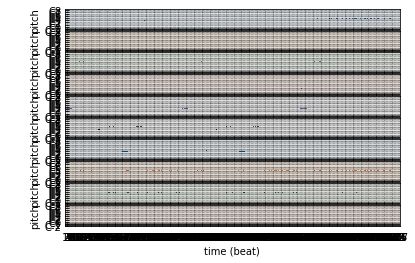

In [14]:
figure(figsize=(20, 10), dpi=80)
multitrack.plot()

In [15]:
pypianoroll.from_pretty_midi(pm)

Multitrack(name=None, resolution=24, tempo=array(shape=(9048, 1), dtype=float64), tracks=[StandardTrack(name='', program=56, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=True, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=108, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=33, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=25, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=26, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=41, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrack(name='', program=82, is_drum=False, pianoroll=array(shape=(9048, 128), dtype=uint8)), StandardTrac

In [16]:
pypianoroll.write("test2.mid", multitrack)

In [17]:
multitrack = pypianoroll.read(path)
for track in multitrack.tracks:
    if track.is_drum:
        print(track.program)
        print(track.pianoroll.shape)
        print(np.unique(track[:,21:128]))

0
(9048, 128)
[  0  60  62  64  65  68  69  72  73  74  75  77  80  85  86  88  90  92
  93  95  96  97  98 100 102 103 104 108 109 115]


In [15]:
import converter
c = converter.MidiTxtConverter()
track = pypianoroll.read(path2)

In [16]:
import compressor
converted = c.multitrack_to_string(track, split_sections=False)
lossless_compressed = compressor.lossless_compression(converted)
decompressed = compressor.decompress(lossless_compressed)
#c.midi_to_txt(path, "here_splitted.txt",split_sections=True)

In [17]:
len(converted), len(lossless_compressed), converted == decompressed, len(decompressed)


(58649, 19196, True, 58649)

In [22]:
training_sample = lossless_compressed.split(" ")[:200]
training_sample2 = converted.split(" ")[:200]

In [24]:
track = c.string_to_multitrack(compressor.decompress(" ".join(training_sample)))
track2 = c.string_to_multitrack(" ".join(training_sample2))

In [8]:
track = c.txt_to_multitrack("here.txt")
track2 = c.txt_to_multitrack("here_splitted.txt")

In [25]:
pypianoroll.write("not_compresse.mid", track2)
pypianoroll.write("compressed.mid", track)